# The Central Limit Theorem

Some illustrations of the CLT via simulations, using a uniform distribution as the original population.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import norm

In [14]:
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)
plt.rcParams['figure.figsize'] = (10, 6)

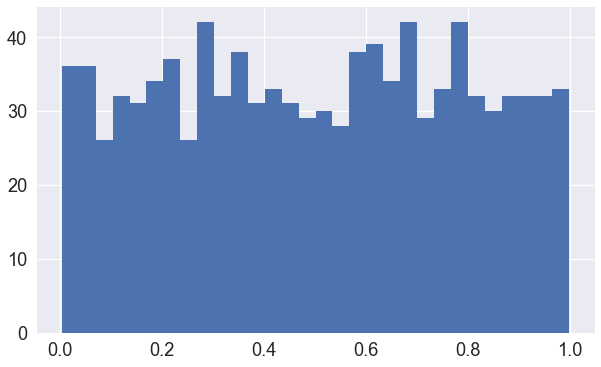

In [15]:
a = np.random.uniform(size=1000)
plt.hist(a, bins=30);

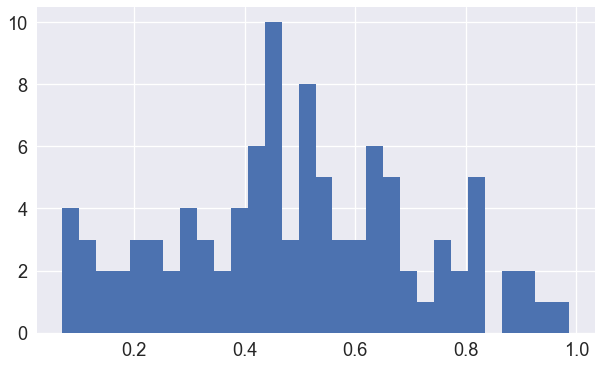

In [16]:
sample_size = 2
repetitions = 100
b = np.random.uniform(size=(sample_size, repetitions))
bav = b.mean(axis=0)
plt.hist(bav, bins=30);

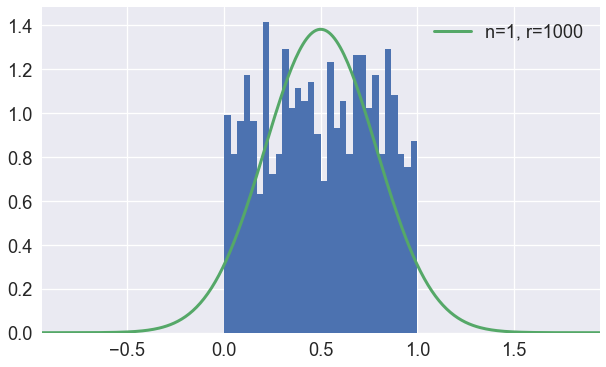

In [17]:
def cl_sample(sample_size, repetitions, ax=None, bins=None):

    bins = 30 if bins is None else bins
    if ax is None:
        fig, ax = plt.subplots()
    
    # mean and variance of the uniform (0,1) distribution
    mu = 0.5
    sigma2_uni = 1/12
    sigma_norm = np.sqrt(sigma2_uni/sample_size)

    sample_means = np.random.uniform(size=(sample_size, repetitions)).mean(axis=0)
    assert sample_means.size == repetitions  # sanity check
   
    xmin_n, xmax_n = mu-5*sigma_norm, mu+5*sigma_norm
    xmin = min(0, xmin_n)
    xmax = max(1, xmax_n)
    x = np.linspace(xmin, xmax, 300)    
    ax.hist(sample_means, density=True, bins=bins);
    ax.plot(x, norm.pdf(x, mu, sigma_norm), lw=3, label=f'n={sample_size}, r={repetitions}')
    ax.set_xlim([xmin, xmax])
    ax.legend()
    return ax

cl_sample(1, 1000);

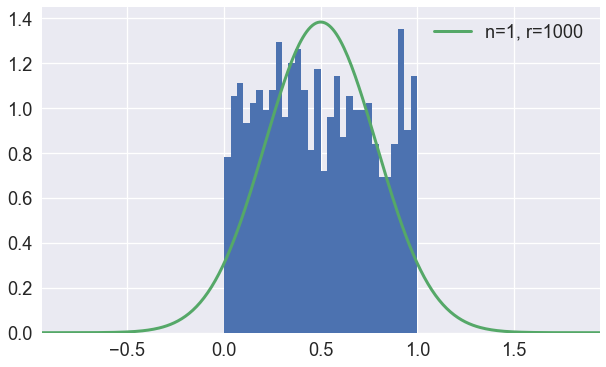

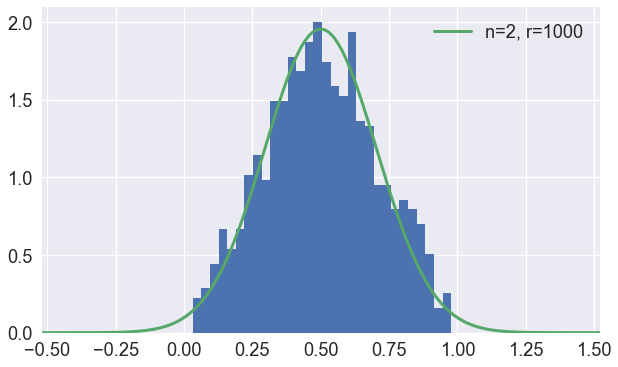

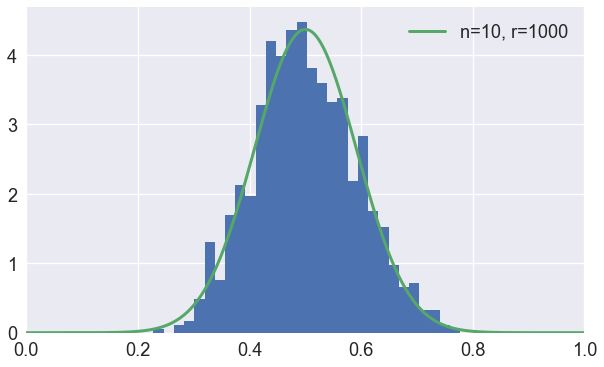

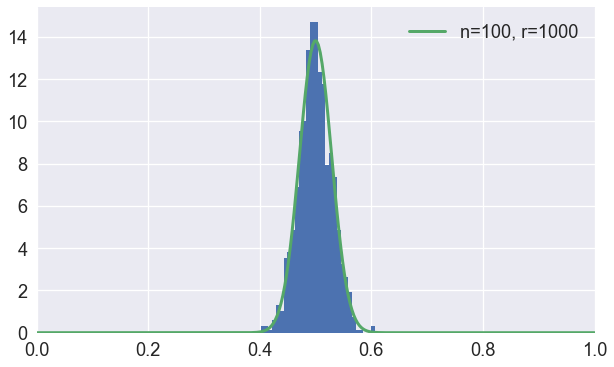

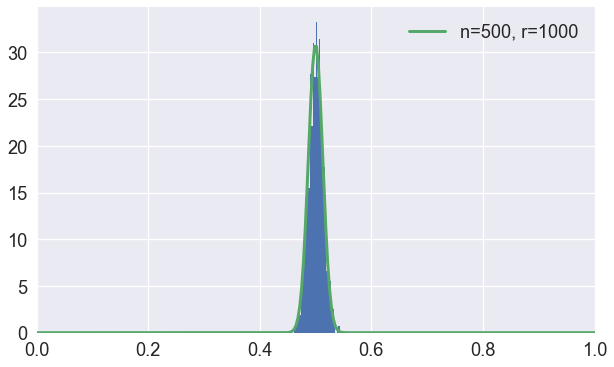

In [18]:
reps = 1_000
for sample_size in [1, 2, 10, 100, 500]:
    clt_sample(sample_size, reps)

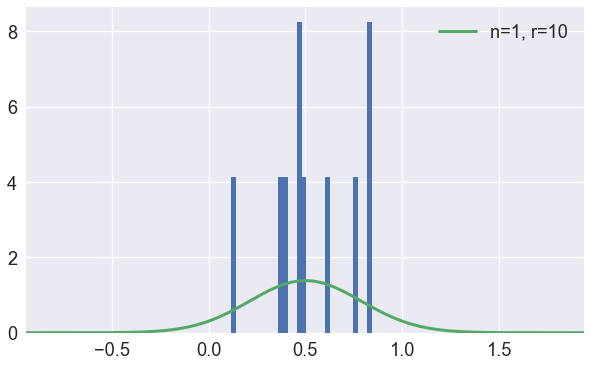

In [19]:
cl_sample(1, 10);

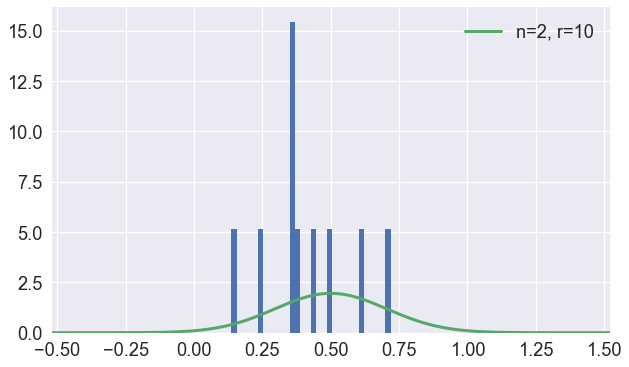

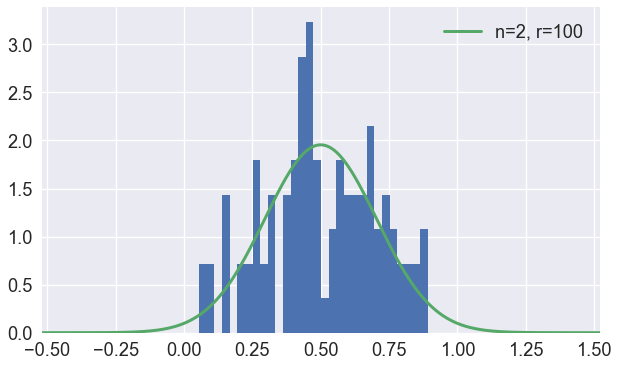

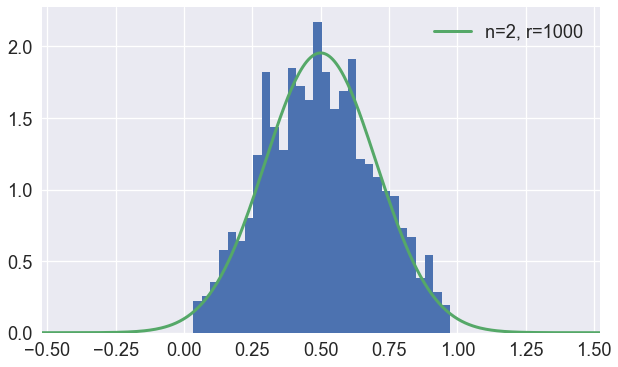

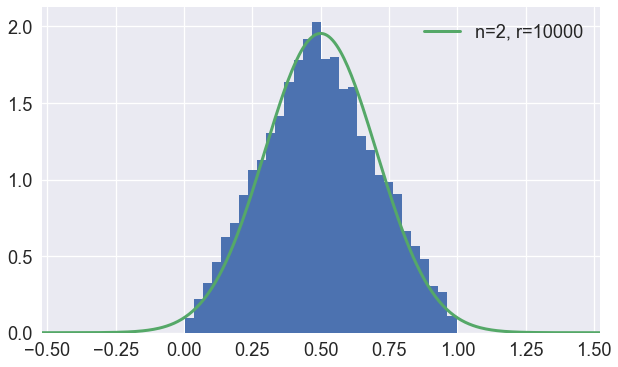

In [20]:
for reps in [10, 100, 1000, 10000]:
    cl_sample(2, reps)